# Service Provider Multi-class Classification

In [1]:
# preprocessing 
import pandas as pd
import numpy as np

# encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

# data splitting
from sklearn.model_selection import train_test_split

# model algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# relative path and reading the data
datapath = "../../data/processed/service_provider_pnumber_label.csv"
mobile_df = pd.read_csv(datapath)

## preprocessing

In [3]:
# checking for missing values
mobile_df.isna().sum()

                     0
Telephone Number     0
Service Provider     0
dtype: int64

In [4]:
# checking for duplicated values
mobile_df.duplicated().sum()

0

In [5]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23154 entries, 0 to 23153
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0                      23154 non-null  int64 
 1   Telephone Number   23154 non-null  object
 2   Service Provider   23154 non-null  object
dtypes: int64(1), object(2)
memory usage: 542.8+ KB


In [6]:
mobile_df.columns #checking columns

Index(['      ', 'Telephone Number ', 'Service Provider'], dtype='object')

In [7]:
mobile_df.drop(mobile_df.columns[0], axis=1, inplace=True) # dropping the index column

In [8]:
mobile_df.tail()

,Telephone Number,Service Provider
23149,08034268185,MTN
23150,08064995656,MTN
23151,08058595159,GLO
23152,07039069136,MTN
23153,09078754424,AIRTEL


## splitting

For this data;
* the feature variable is **`Telephone Number`**
* and the target variable is **`Service Provider`**

In [9]:
# X and Y features
X = mobile_df['Telephone Number ']
y = mobile_df['Service Provider']

In [10]:
# splitting data into train and test sets (80% to 20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## feature engineering

using **`One-Hot Encoding`** preferably for encoding out features

In [11]:
type(y_train)
y_train.value_counts()

Service Provider
MTN        12055
AIRTEL      3368
GLO         2622
9MOBILE      478
Name: count, dtype: int64

In [37]:
X_train.head()

6781     07025889605      
15150    08037798712      
22357    08029755952      
21789    09137956081      
1419     08145609738      
Name: Telephone Number , dtype: object

In [12]:
type(y_test)
y_test.value_counts()

Service Provider
MTN        2992
AIRTEL      869
GLO         661
9MOBILE     109
Name: count, dtype: int64

In [13]:
# extracting phone number prefixes
X_train_prefix = X_train.str[:4]
X_test_prefix = X_test.str[:4]

In [14]:
X_test_prefix

7007     0810
18864    0816
13959    0705
7639     0916
15320    0705
         ... 
4863     0806
20401    0803
11429    0901
4411     0708
10544    0903
Name: Telephone Number , Length: 4631, dtype: object

In [15]:
# one-hot encoding initialization
prefix_encoder = OneHotEncoder(sparse=False)
serviceprovider_encoder = OneHotEncoder(sparse=False)

In [16]:
# fit transform the training set and transform the test set
X_train_prefix_encoded = prefix_encoder.fit_transform(X_train_prefix.values.reshape(-1,1))
X_test_prefix_encoded = prefix_encoder.transform(X_test_prefix.values.reshape(-1, 1))
y_train_encoded = serviceprovider_encoder.fit_transform(y_train.values.reshape(-1, 1))

/home/lordmax/.virtualenvs/providerenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/lordmax/.virtualenvs/providerenv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### quick checks

In [17]:
X_train_prefix_encoded

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
train_set_encoded = pd.DataFrame(X_train_prefix_encoded.copy())

In [19]:
train_set_encoded.head(20)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## modelling

### xgboost

Training

In [20]:
xgb_model = XGBClassifier() # model initializing

xgb_model.fit(X_train_prefix_encoded, y_train_encoded) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

prediction & model accuracy

In [21]:
# prediction - test set
y_pred_encoded_xgb = xgb_model.predict(X_test_prefix_encoded)

# inverse transform, to original service providers (i.e mtn, glo etc)
y_pred_xgb = serviceprovider_encoder.inverse_transform(y_pred_encoded_xgb)

In [22]:
# accuracy metric
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [23]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

     9MOBILE       1.00      1.00      1.00       109
      AIRTEL       1.00      1.00      1.00       869
         GLO       1.00      1.00      1.00       661
         MTN       1.00      1.00      1.00      2992

    accuracy                           1.00      4631
   macro avg       1.00      1.00      1.00      4631
weighted avg       1.00      1.00      1.00      4631



### logistic regression

In [24]:
# encoding
serviceprovider_encoder2 = LabelEncoder()
y_train_encoded2 = serviceprovider_encoder2.fit_transform(y_train)

In [25]:
# training
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_prefix_encoded, y_train_encoded2)

LogisticRegression(max_iter=1000)

In [26]:
# Make predictions on the test set
y_pred_encoded_logistic = logistic_model.predict(X_test_prefix_encoded)
y_pred_logistic = serviceprovider_encoder2.inverse_transform(y_pred_encoded_logistic)

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f"Logistic Regression Accuracy: {accuracy * 100:.2f}%")

Logistic Regression Accuracy: 100.00%


### random forest

In [28]:
forest_model = RandomForestClassifier()

forest_model.fit(X_train_prefix_encoded, y_train_encoded) 

RandomForestClassifier()

In [29]:
# prediction - test set
y_pred_encoded_forest = forest_model.predict(X_test_prefix_encoded)

# inverse transform, to original service providers (i.e mtn, glo etc)
y_pred_forest = serviceprovider_encoder.inverse_transform(y_pred_encoded_forest)

In [30]:
# accuracy metric
accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


### confusion matrix

In [31]:
# for xgboost 
xgboost_confusion_matrix = confusion_matrix(y_test, y_pred_xgb)

# for logistic regression
logistic_confusion_matrix = confusion_matrix(y_test, y_pred_logistic)

In [32]:
# For XGBoost
print("Confusion Matrix (XGBoost):")
print(xgboost_confusion_matrix)
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix (XGBoost):
[[ 109    0    0    0]
 [   0  869    0    0]
 [   0    0  661    0]
 [   0    0    0 2992]]

Classification Report (XGBoost):


              precision    recall  f1-score   support

     9MOBILE       1.00      1.00      1.00       109
      AIRTEL       1.00      1.00      1.00       869
         GLO       1.00      1.00      1.00       661
         MTN       1.00      1.00      1.00      2992

    accuracy                           1.00      4631
   macro avg       1.00      1.00      1.00      4631
weighted avg       1.00      1.00      1.00      4631



In [33]:
# For Logistic Regression
print("Confusion Matrix (Logistic Regression):")
print(logistic_confusion_matrix)
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_logistic))

Confusion Matrix (Logistic Regression):
[[ 109    0    0    0]
 [   0  869    0    0]
 [   0    0  661    0]
 [   0    0    0 2992]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

     9MOBILE       1.00      1.00      1.00       109
      AIRTEL       1.00      1.00      1.00       869
         GLO       1.00      1.00      1.00       661
         MTN       1.00      1.00      1.00      2992

    accuracy                           1.00      4631
   macro avg       1.00      1.00      1.00      4631
weighted avg       1.00      1.00      1.00      4631



In [34]:
confusion_matrix(y_test, y_pred_logistic).ravel()

array([ 109,    0,    0,    0,    0,  869,    0,    0,    0,    0,  661,
          0,    0,    0,    0, 2992])

<Axes: >

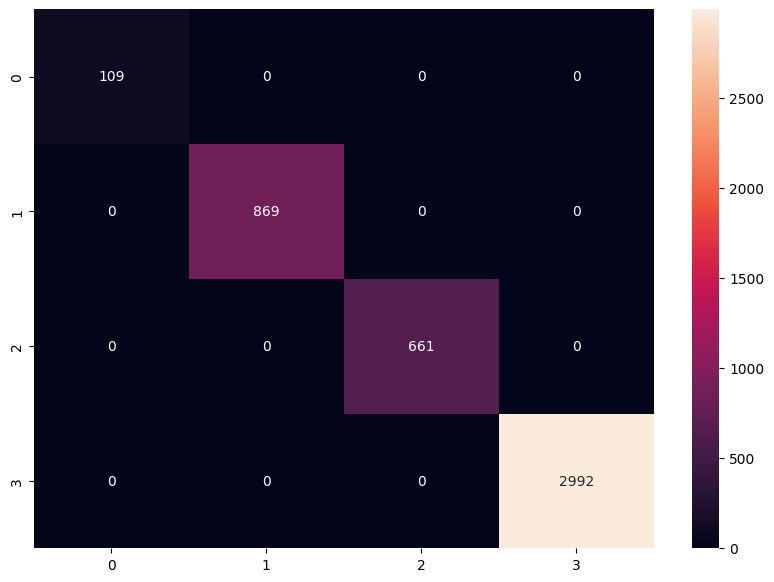

In [35]:
plt.figure(figsize=(10, 7))
sns.heatmap(logistic_confusion_matrix, annot=True, fmt='g')